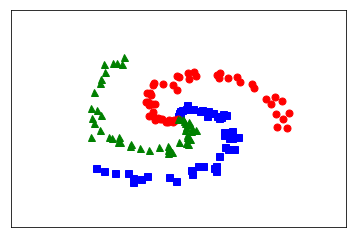

In [12]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
import math
import numpy as np
import matplotlib.pyplot as plt

N = 50 # number of points per clas
d0 = 2 # dimensionality
C = 3 # number of classes
X = np.zeros((d0, N*C)) # data matrix (each row = single example)
y = np.zeros(N*C, dtype='uint8') # class labels

for j in range(C):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[:,ix] = np.c_[r*np.sin(t), r*np.cos(t)].T
  y[ix] = j
# lets visualize the data:
# plt.scatter(X[:N, 0], X[:N, 1], c=y[:N], s=40, cmap=plt.cm.Spectral)

plt.plot(X[0, :N], X[1, :N], 'bs', markersize = 7);
plt.plot(X[0, N:2*N], X[1, N:2*N], 'ro', markersize = 7);
plt.plot(X[0, 2*N:], X[1, 2*N:], 'g^', markersize = 7);
# plt.axis('off')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

plt.savefig('EX.png', bbox_inches='tight', dpi = 600)
plt.show()

In [0]:
def softmax(V):
    e_V = np.exp(V - np.max(V, axis = 0, keepdims = True))
    Z = e_V / e_V.sum(axis = 0)
    return Z

## One-hot coding
from scipy import sparse
def convert_labels(y, C = 3):
    Y = sparse.coo_matrix((np.ones_like(y),
        (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y

# cost or loss function
def cost(Y, Yhat):
    return -np.sum(Y*np.log(Yhat))/Y.shape[1]

In [0]:
d0 = 2
d1 = h = 100 # size of hidden layer
d2 = C = 3
# initialize parameters randomly
W1 = 0.01*np.random.randn(d0, d1)
b1 = np.zeros((d1, 1))
W2 = 0.01*np.random.randn(d1, d2)
b2 = np.zeros((d2, 1))

Y = convert_labels(y, C)
N = X.shape[1]
eta = 1 # learning rate
for i in range(10000):
    ## Feedforward
    Z1 = np.dot(W1.T, X) + b1
    A1 = np.maximum(Z1, 0)
    Z2 = np.dot(W2.T, A1) + b2
    Yhat = softmax(Z2)

    # print loss after each 1000 iterations
    if i %1000 == 0:
        # compute the loss: average cross-entropy loss
        loss = cost(Y, Yhat)
        print("iter %d, loss: %f" %(i, loss))

    # backpropagation
    E2 = (Yhat - Y )/N
    dW2 = np.dot(A1, E2.T)
    db2 = np.sum(E2, axis = 1, keepdims = True)
    E1 = np.dot(W2, E2)
    E1[Z1 <= 0] = 0 # gradient of ReLU
    dW1 = np.dot(X, E1.T)
    db1 = np.sum(E1, axis = 1, keepdims = True)

    # Gradient Descent update
    W1 += -eta*dW1
    b1 += -eta*db1
    W2 += -eta*dW2
    b2 += -eta*db2

iter 0, loss: 1.098539
iter 1000, loss: 0.138189
iter 2000, loss: 0.093265
iter 3000, loss: 0.049948
iter 4000, loss: 0.037904
iter 5000, loss: 0.031204
iter 6000, loss: 0.027283
iter 7000, loss: 0.024749
iter 8000, loss: 0.022909
iter 9000, loss: 0.021533


In [0]:
Z1 = np.dot(W1.T, X) + b1
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T, A1) + b2
predicted_class = np.argmax(Z2, axis=0)
print('training accuracy: %.2f %%' % (100*np.mean(predicted_class == y)))

training accuracy: 99.33 %
